In [1]:
import pandas as pd
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
#from sklearn.preprocessing import StandardScaler
#from scipy import stats
#import pandas_profiling
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df1 = pd.read_csv("data1_new.csv")

In [3]:
df1.duplicated().sum()

0

**1. Examine data1_new dataset (df1)**

In [4]:
df1.head()

,id,c_type,product,date,cost
0,lvuhzmoc7oe2tx4j,group1,product4,2020-02-01,1.789952
1,5feydxuoc6x2y5qj,group1,product4,2020-02-01,1.944925
2,dlfj8bm8o1mjn1ee,group1,product4,2020-02-01,2.102154
3,4k8b1wt1emx4e0fc,group2,product4,2020-02-01,0.000000
4,53uekb9p71u3p3h2,group1,product4,2020-02-01,2.274721


In [5]:
df1.tail()

,id,c_type,product,date,cost
573754,hfdzh9cj7d6jeahi,group1,product3,2020-12-28,0.275054
573755,dv46x6lbghepkdac,group2,product3,2020-12-28,0.000000
573756,dg4swflvq5tyy6le,group1,product3,2020-12-28,0.337841
573757,t4o3v49fayyfas1f,group2,product3,2020-12-28,0.000000
573758,k4y0jy4838sh30as,group2,product3,2020-12-28,0.000000


In [6]:
df1.shape

(573759, 5)

In [7]:
df1.dtypes

id          object
c_type      object
product     object
date        object
cost       float64
dtype: object

In [8]:
#We should convert type of date column from object to date time.
df1['date'] = pd.to_datetime(df1['date'])

In [9]:
type(df1.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
df1.dtypes

id                 object
c_type             object
product            object
date       datetime64[ns]
cost              float64
dtype: object

In [11]:
# Now it is ok.

In [12]:
df1.describe(include=["object", "datetime", "float"])

,id,c_type,product,date,cost
count,573759,573759,573759,573759,573759.000000
unique,573759,2,4,267,NaN
top,xul1cmrql0kioyww,group1,product2,2020-08-04 00:00:00,NaN
freq,1,311359,328075,5771,NaN
first,NaN,NaN,NaN,2020-02-01 00:00:00,NaN
last,NaN,NaN,NaN,2020-12-28 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,0.814830
std,NaN,NaN,NaN,NaN,2.570275
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000


In [12]:
# id column is unique.
# The mean value for cost column is $0.8 however the max value is $98 and the std is 2.5. Outliers!
# The data covers Feb-Dec period.
# c_type column has two unique values, product column has four.
# Most common product is My product2.

In [13]:
df1.isnull().sum()

id         0
c_type     0
product    0
date       0
cost       0
dtype: int64

In [14]:
# There is no missing value
# Let's examine the columns

**cost column**

In [15]:
df1['cost'].describe()

count    573759.000000
mean          0.814830
std           2.570275
min           0.000000
25%           0.000000
50%           0.000000
75%           0.505289
max          98.283126
Name: cost, dtype: float64

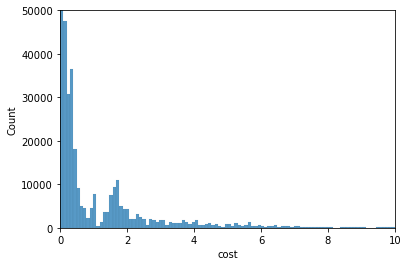

In [16]:
fig, ax = plt.subplots()
sns.histplot(x="cost", data=df1, bins=1000)
ax.set_xlim([0,10])
ax.set_ylim([0,50000]);

<AxesSubplot:ylabel='cost'>

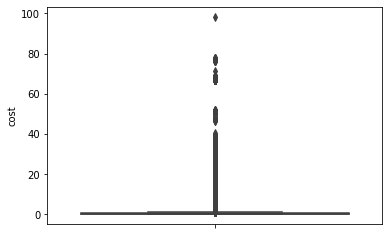

In [17]:
fig, ax = plt.subplots()
sns.boxplot(y="cost", data=df1)

In [17]:
# The median value is very close to zero. However there are lots of outliers.
# Let's seperate group1 and group2 in the boxplot.

<AxesSubplot:xlabel='c_type', ylabel='cost'>

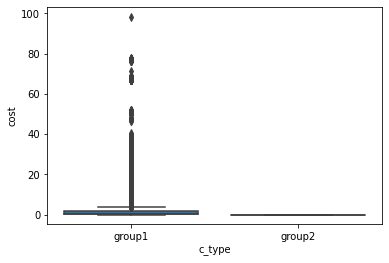

In [18]:
fig, ax = plt.subplots()
sns.boxplot(y="cost", x="c_type", data=df1)

In [19]:
# the cost values for group2 are completely zero.
# Let's count and visualise them.

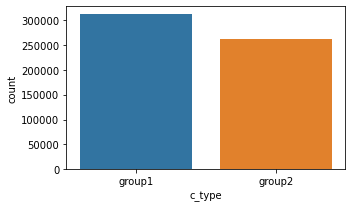

In [20]:
plt.figure(figsize=(5, 3))
sns.countplot(x='c_type', data=df1);

In [21]:
# Roughly half of them are group1. Number of group1 are slightly more than group2.
# Now let's see the mean value of cost column.

In [38]:
df1.groupby('c_type')['cost'].agg('mean')

c_type
group1    1.501533
group2    0.000000
Name: cost, dtype: float64

In [40]:
#df1.groupby('c_type')['cost'].mean()

In [23]:
# Most probably, the median will much differ from the mean because of outliers.

In [21]:
df1.groupby('c_type')['cost'].agg('median')

c_type
group1    0.434207
group2    0.000000
Name: cost, dtype: float64

In [25]:
# Yes mean and median differs.
# There are lots of outliers. So to consider the median rather than the mean makes sense. 
# The median value for cost is $0.43 if it is group1.
# cost is the money to acquire the item via paid adverts on Facebook, Youtube etc.
# It is very important because it represents the money that the company spends.

**product column**

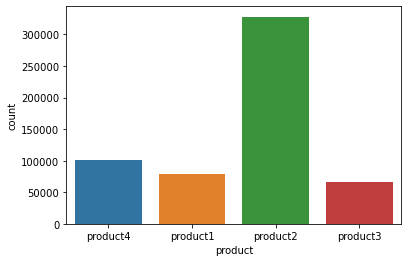

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x='product', data=df1);

In [27]:
# About half of the products consist of product2.
# Now let's calculate the median values.

In [44]:
df1.groupby('product')['cost'].agg('median')

product
product1    2.659642
product2    0.000000
product3    0.000000
product4    1.053078
Name: cost, dtype: float64

In [29]:
# It seems product1 is the most costly product. But we should remove the "group2" group.
# Because "cost" values of group2s are completely zero and causes misinterpretation.

In [45]:
df1[df1['c_type'] == 'group1'].groupby('product')['cost'].median()

product
product1    4.012347
product2    0.259849
product3    0.460018
product4    1.592435
Name: cost, dtype: float64

In [31]:
# Let's visualise these values.

In [51]:
df_g1=df1[df1['c_type'] == 'group1']

<AxesSubplot:xlabel='product', ylabel='cost'>

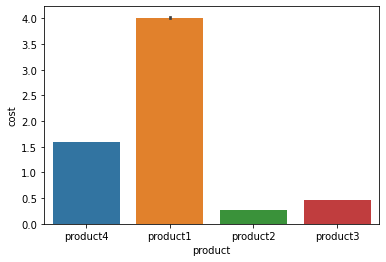

In [52]:
sns.barplot(x="product", y="cost", estimator=np.median, data=df_g1)

In [24]:
# Doing the same plot with pandas
#df1[df1['c_type'] == 'group1'].groupby('product')['cost'].median().plot.bar(figsize=(5, 3));

In [33]:
# Now we have taken into consideration only "group1" values (not group2s).
# Still the product1 is the most costly product. Product2 is the cheapest about ads.
# This table help us making decision. So far Product2 might be the best choice.
# Because it is most common and the cheapest product.
# But we need to continue exploring the data. It is too early to make a decision.

**2. Examine data2_new
 dataset (df2)**

In [25]:
df2 = pd.read_csv("data2_new.csv") 

In [26]:
df2.duplicated().sum()

195486

In [27]:
df2.shape[0]

2279215

In [28]:
df2.duplicated().sum()/df2.shape[0]

0.08576900380174753

In [29]:
df2.drop_duplicates(inplace=True)

In [30]:
df2.shape

(2083729, 5)

In [31]:
df2.duplicated().sum()

0

In [32]:
df2.head()

,id,group1_revenue,group2_revenue,product,transaction_date
0,5afg4b871bvs42ai,0.0,0.0,product1,2020-05-17
1,3js4iaq9fuooizrl,0.0,0.0,product1,2020-04-03
2,ws45348zv2hm76l4,0.0,0.0,product1,2020-04-05
3,tmrvq606rif8xiqx,0.0,0.0,product1,2020-04-09
4,y2hxfwpjj1912wif,0.0,0.0,product1,2020-04-06


In [33]:
df2.shape

(2083729, 5)

In [34]:
df2.dtypes

id                   object
group1_revenue      float64
group2_revenue      float64
product              object
transaction_date     object
dtype: object

In [35]:
# We should convert type of transaction_date column from object to date time.
df2['transaction_date'] = pd.to_datetime(df2['transaction_date'])

In [36]:
df2.describe(include=["object", "datetime", "float"])

,id,group1_revenue,group2_revenue,product,transaction_date
count,2083729,2.083729e+06,2.083729e+06,2083729,2083729
unique,573759,NaN,NaN,4,267
top,iaxxd1dlmq8ll2fn,NaN,NaN,product2,2020-09-29 00:00:00
freq,89,NaN,NaN,955473,19763
first,NaN,NaN,NaN,NaN,2020-02-01 00:00:00
last,NaN,NaN,NaN,NaN,2020-12-28 00:00:00
mean,NaN,1.375660e-01,1.289518e-02,NaN,NaN
std,NaN,3.333828e+00,9.720425e-02,NaN,NaN
min,NaN,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,0.000000e+00,0.000000e+00,NaN,NaN


In [31]:
# id column is NOT unique.
# There are outliers at revenue columns.
# The data covers Feb-Dec period.
# The product column has four unique values.
# Most common product is product2.

In [32]:
df2.isnull().sum()

id                  0
group1_revenue      0
group2_revenue      0
product             0
transaction_date    0
dtype: int64

In [42]:
# No mising values.
# Let's examine the columns

**group1_revenue and group2_revenue columns**

In [33]:
df2['group1_revenue'].describe()

count    2.083729e+06
mean     1.375660e-01
std      3.333828e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.670690e+03
Name: group1_revenue, dtype: float64

<AxesSubplot:ylabel='group1_revenue'>

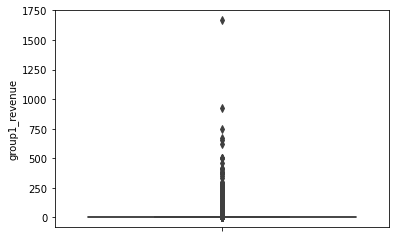

In [34]:
fig, ax = plt.subplots()
sns.boxplot(y="group1_revenue", data=df2)

In [35]:
df2['group1_revenue'].median()

0.0

In [36]:
df2['group1_revenue'].mean()

0.13756602517049377

In [37]:
# The median value is zero. However there are lots of outliers.

In [38]:
df2['group2_revenue'].describe()

count    2.083729e+06
mean     1.289518e-02
std      9.720425e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.755219e+01
Name: group2_revenue, dtype: float64

<AxesSubplot:ylabel='group2_revenue'>

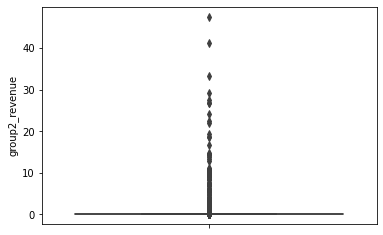

In [39]:
sns.boxplot(y="group2_revenue", data=df2)

In [40]:
df2['group2_revenue'].median()

0.0

In [41]:
df2['group2_revenue'].mean()

0.012895181863078968

In [52]:
# The median value is zero. However there are lots of outliers.

**product column**

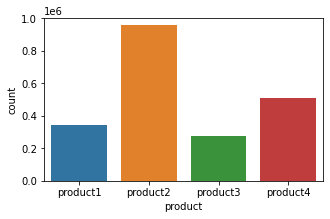

In [42]:
plt.figure(figsize=(5 ,3))
sns.countplot(x='product', data=df2);

In [54]:
# Product2 is the most common product.
# Now let's see the avg group1_revenues for each product.

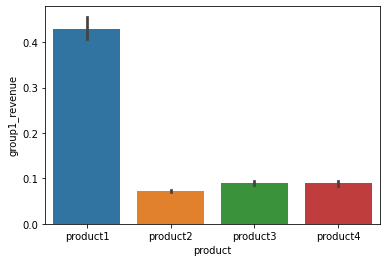

In [43]:
sns.barplot(x="product", y="group1_revenue", data=df2);

In [80]:
# same plot with pandas
#df2.groupby('product')['group1_revenue'].mean().plot.bar(figsize=(5, 3));

In [56]:
# The Product1 has the best group1_revenue avg.

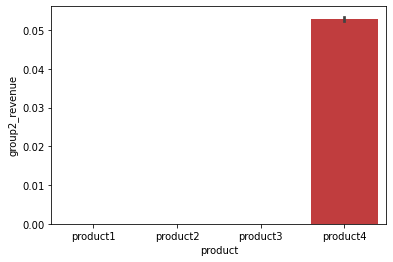

In [51]:
sns.barplot(x="product", y="group2_revenue", data=df2);

In [79]:
#df2.groupby('product')['group2_revenue'].mean().plot.bar(figsize=(5, 3));

In [58]:
# The Product4 has the best group2_revenue avg.

In [59]:
# Now let's see the sum of revenues

In [37]:
df2["total_rev"]=df2["group1_revenue"]+df2["group2_revenue"]

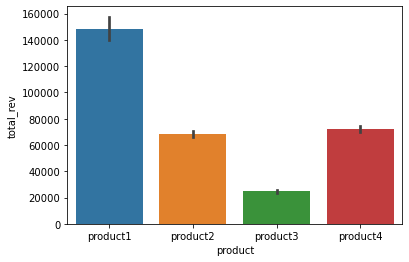

In [38]:
sns.barplot(x="product", y="total_rev", estimator=np.sum, data=df2);

In [65]:
# The Product1 has the highest total revenue

In [66]:
# Now let's see the total expenses (cost) for each product.

<AxesSubplot:xlabel='product', ylabel='cost'>

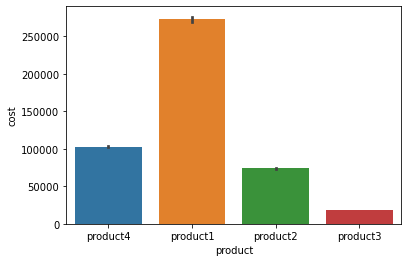

In [39]:
sns.barplot(x="product", y="cost", estimator=np.sum, data=df1)

In [85]:
#df1.groupby('product')['cost'].sum().plot.bar(figsize=(5, 3));

In [46]:
df1.head()

,id,c_type,product,date,cost
0,lvuhzmoc7oe2tx4j,group1,product4,2020-02-01,1.789952
1,5feydxuoc6x2y5qj,group1,product4,2020-02-01,1.944925
2,dlfj8bm8o1mjn1ee,group1,product4,2020-02-01,2.102154
3,4k8b1wt1emx4e0fc,group2,product4,2020-02-01,0.000000
4,53uekb9p71u3p3h2,group1,product4,2020-02-01,2.274721


In [65]:
cost=df1.groupby("product").cost.sum()
cost

product
product1    272614.756430
product2     74095.083701
product3     18313.733732
product4    102492.189384
Name: cost, dtype: float64

In [53]:
df2.head()

,id,group1_revenue,group2_revenue,product,transaction_date,total_rev
0,5afg4b871bvs42ai,0.0,0.0,product1,2020-05-17,0.0
1,3js4iaq9fuooizrl,0.0,0.0,product1,2020-04-03,0.0
2,ws45348zv2hm76l4,0.0,0.0,product1,2020-04-05,0.0
3,tmrvq606rif8xiqx,0.0,0.0,product1,2020-04-09,0.0
4,y2hxfwpjj1912wif,0.0,0.0,product1,2020-04-06,0.0


In [54]:
rev=df2.groupby("product").total_rev.sum()
rev

product
product1    148582.514010
product2     68361.057425
product3     24616.426104
product4     71960.382931
Name: total_rev, dtype: float64

In [55]:
profit={"cost":cost, "rev":rev, "profit":rev-cost}

In [56]:
df_profit=pd.DataFrame(profit)

In [57]:
df_new=df_profit.reset_index()

In [58]:
df_new.head()

,product,cost,rev,profit
0,product1,272614.756430,148582.514010,-124032.242419
1,product2,74095.083701,68361.057425,-5734.026275
2,product3,18313.733732,24616.426104,6302.692372
3,product4,102492.189384,71960.382931,-30531.806453


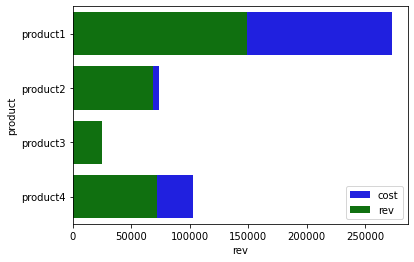

In [59]:
f, ax = plt.subplots()
sns.barplot(x="cost", y="product", data=df_new,
            label="cost", color="b")
sns.barplot(x="rev", y="product", data=df_new,
            label="rev", color="g")
#sns.barplot(x="profit", y="product", data=df_new,
#            label="profit", color="r")
ax.legend(loc=4);

In [60]:
df_profit

,cost,rev,profit
product,,,
product1,272614.756430,148582.514010,-124032.242419
product2,74095.083701,68361.057425,-5734.026275
product3,18313.733732,24616.426104,6302.692372
product4,102492.189384,71960.382931,-30531.806453


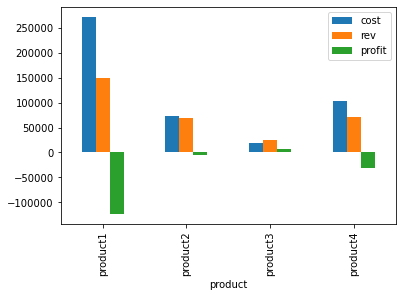

In [61]:
df_profit.plot.bar();

In [72]:
# It seems when total income and expenses evaluated together
# Except for product3 all products have a bad performance

**TIME PLOTS**

**1.Expense (cost) plots**

In [73]:
# Let's create function to plot cost costs.

In [40]:
def cost_plot(df, title):
    x = df['date']
    y = df['cost']
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(x, y, color='red', marker='.', markersize=1, linestyle=" ")
    ax.set_title(title);

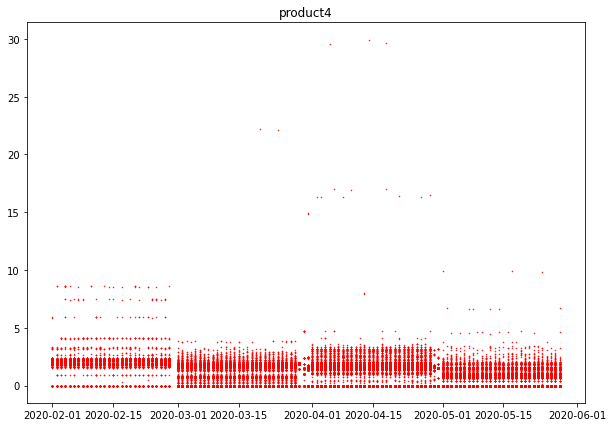

In [41]:
df = df1[df1['product'] == 'product4']
cost_plot(df, 'product4')

In [82]:
# The costs are stable.

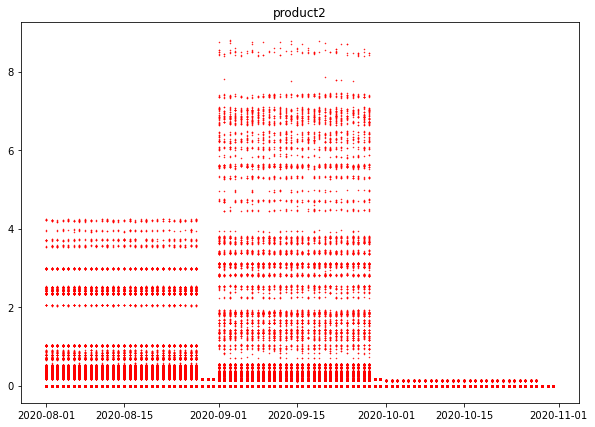

In [42]:
df = df1[df1['product'] == 'product2']
cost_plot(df, 'product2')

In [84]:
# The costs are decreasing. Very close to zero in last three months.

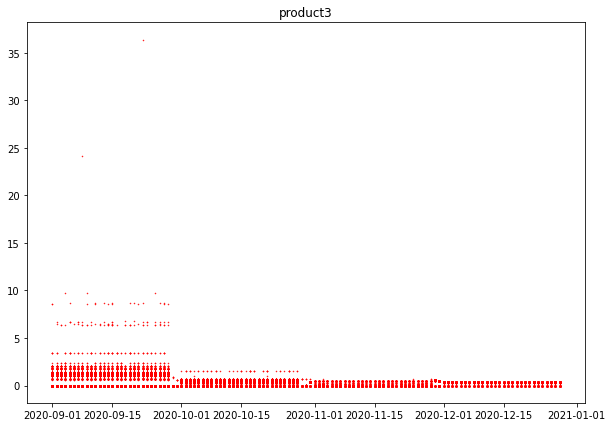

In [43]:
df = df1[df1['product'] == 'product3']
cost_plot(df, 'product3')

In [86]:
# The costs are decreasing

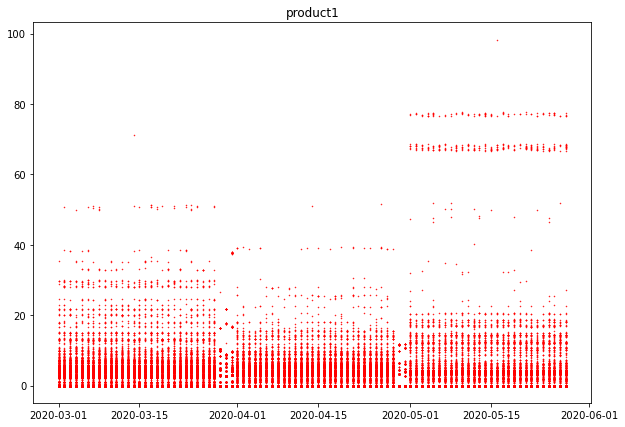

In [44]:
df = df1[df1['product'] == 'product1']
cost_plot(df, 'product1')

In [88]:
# The costs are slightly incresing.

**2. revenue plots**

In [45]:
def revenue_plot(df, title):
    x = df['transaction_date']
    y = df['total_rev']
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(x, y, color='blue', marker='.', markersize=1, linestyle=" ")
    ax.set_title(title);

In [46]:
# We should sum group1 and group2 revenues and create a new column as revenue

In [47]:
df2.head()

,id,group1_revenue,group2_revenue,product,transaction_date,total_rev
0,5afg4b871bvs42ai,0.0,0.0,product1,2020-05-17,0.0
1,3js4iaq9fuooizrl,0.0,0.0,product1,2020-04-03,0.0
2,ws45348zv2hm76l4,0.0,0.0,product1,2020-04-05,0.0
3,tmrvq606rif8xiqx,0.0,0.0,product1,2020-04-09,0.0
4,y2hxfwpjj1912wif,0.0,0.0,product1,2020-04-06,0.0


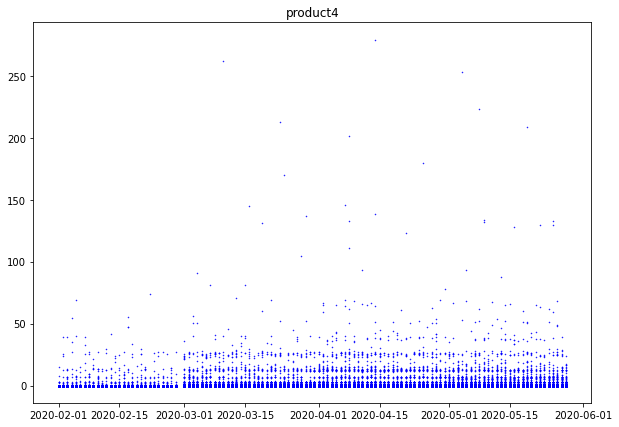

In [48]:
df = df2[df2['product'] == 'product4']
revenue_plot(df, 'product4')

In [98]:
# Incomes are stable. Not increasing.

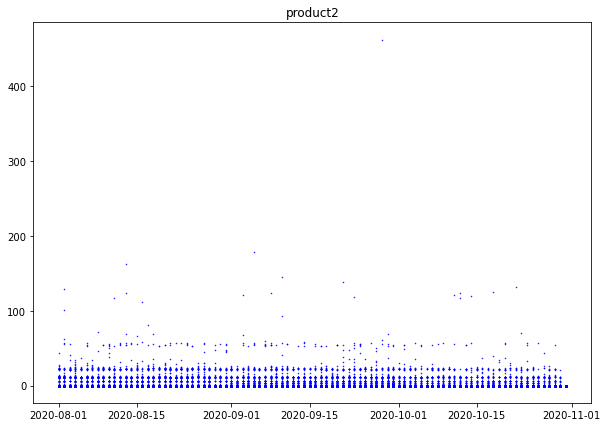

In [49]:
df = df2[df2['product'] == 'product2']
revenue_plot(df, 'product2')

In [95]:
# Incomes are stable. Not increasing.

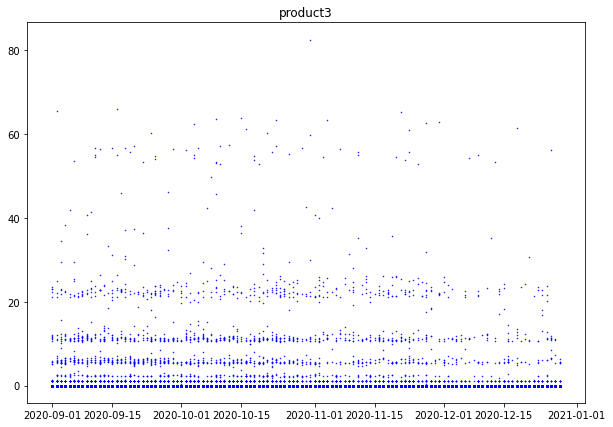

In [50]:
df = df2[df2['product'] == 'product3']
revenue_plot(df, 'product3')

In [200]:
# Incomes are stable. Not increasing.

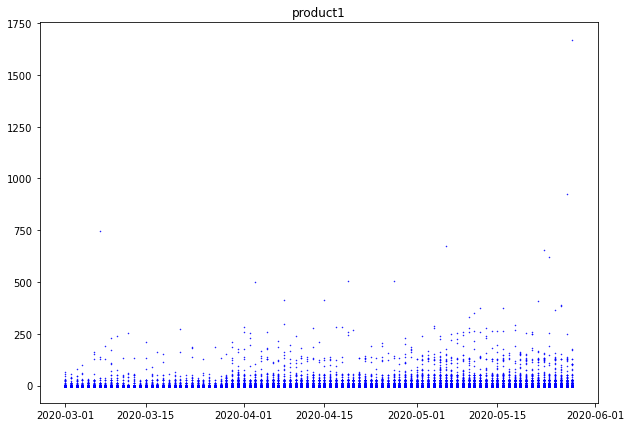

In [51]:
df = df2[df2['product'] == 'product1']
revenue_plot(df, 'product1')

In [76]:
# Incomes are increasing.

**Final Assessment:**

-When we examine only data1_new dataset, we concluded:
      - product2 is the most common product,
      - product1 was the most costly product and product2 was the cheapest according to medain values.
     
-But we continued exploring the data. It was too early to make a decision.

-When data2_new dataset examined we noticed:

      - The product1 has the best group1_revenue avg,
      - The product4 has the best group2_revenue avg,
      - But it was logical to sum the revenues rather than evaluating avg values
      
-When sum of the revenues evaluated we noticed:

      - The product1 has the highest total revenue,
      - The product3 has the least total revenue.
      
-When sum of the revenues and expenses evaluated together we concluded:

       - Except for product3 all products have a bad performance (all negative profit except product3) 
       - However the profit & loss ratio for product2 is not so bad.
       - And product2 is the most common product,


-When time plots examined we noticed:

       - Costs for the product2 are decreasing sharply, however almost stable for the rest.
       - Revenues are almost stable for all the products.
       
-Final Decision

         We recommend the product2. That product is preferable because 
         it is the most common product and the costs are decreasing
         (almost zero in the most recent months).